In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [32]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [33]:
datapath = "/content/MyDrive/MyDrive/fyp/dataset"

In [34]:
print(datapath)

/content/MyDrive/MyDrive/fyp/dataset


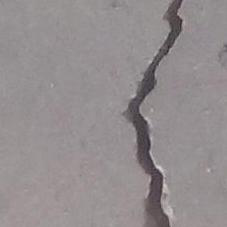

In [35]:
from PIL import Image
pos = '/content/MyDrive/MyDrive/fyp/dataset/Train/Positive/00004.jpg'
image = Image.open(pos)
image.show()



In [38]:
data_dir = "/content/MyDrive/MyDrive/fyp/dataset/Train"
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5952 files belonging to 2 classes.
Using 4762 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5952 files belonging to 2 classes.
Using 1190 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


In [41]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='sigmoid'))

In [42]:
resnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [43]:
# compiling the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Start training the model
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
149/149 [==============================] - 26s 137ms/step - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0292 - val_accuracy: 0.9950
Epoch 2/10
149/149 [==============================] - 20s 129ms/step - loss: 3.8285e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9983
Epoch 3/10
149/149 [==============================] - 20s 128ms/step - loss: 6.2370e-05 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 4/10
149/149 [==============================] - 20s 128ms/step - loss: 2.4278e-05 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 5/10
149/149 [==============================] - 19s 128ms/step - loss: 1.4652e-05 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9983
Epoch 6/10
149/149 [==============================] - 20s 129ms/step - loss: 8.1529e-06 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9983
Epoch 7/10
149/149 [==============================] - 19s 128ms/step - loss: 7.1384e-06 - accuracy: 1.0000 - v

In [ ]:
# saving the model
resnet_model.save_weights('/content/MyDrive/MyDrive/fyp/Train_ResNet50.h5')

In [45]:
# loading the model
resnet_model.load_weights('/content/MyDrive/MyDrive/fyp/Train_ResNet50.h5') 

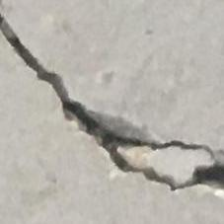

In [46]:
import cv2
from PIL import Image
img = "/content/MyDrive/MyDrive/fyp/dataset/Train/Positive/03765.jpg"
image=cv2.imread(img)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pil_image = Image.fromarray(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
pil_image.show()
# print(image.shape)

In [47]:
# performing prediction on the image
pred=resnet_model.predict(image)
# print(pred)

1/1 [==============================] - 1s 853ms/step


In [48]:
# predicting the output class
import numpy as np
from PIL import Image
output_class=class_names[np.argmax(pred)]
#from IPython.display import display
#image = Image.open(img)
#display(image)
 
print("The predicted class is", output_class)

The predicted class is Positive


In [18]:
# Highlighting the cracks for visual representation
import cv2
import numpy as np
from PIL import Image

def highlight_crack(image_path, model):
    # Load and preprocess the image
    img_height, img_width = 224, 224
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (img_height, img_width))
    image_normalized = image_resized / 255.0  # Normalize the image
    image = np.expand_dims(image_normalized, axis=0)

    # Perform prediction
    pred = model.predict(image)
    output_class = np.argmax(pred)
    class_names = ['Negative', 'Positive'] 

    # Visualize the predicted class
    #print("The predicted class is", class_names[output_class])

    # Highlight crack in the image
    crack_mask = pred[..., output_class]  # Extract the predicted crack mask
    crack_mask = np.squeeze(crack_mask)  # Remove the batch dimension if present
    crack_mask = cv2.resize(crack_mask, (image.shape[2], image.shape[1]))  # Resize mask to original image size
    crack_mask = (crack_mask * 255).astype(np.uint8)  # Scale mask to 0-255 range

    # Apply the crack mask as an overlay on the original image
    overlay = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    overlay[..., 0] += crack_mask
    overlay[..., 1] -= crack_mask
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Display the result
    pil_image = Image.fromarray(overlay)
    pil_image.show()


1/1 [==============================] - 0s 40ms/step


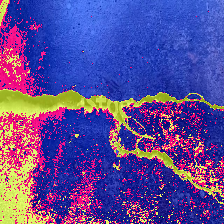

In [23]:
# Calling the highlight function
image_path = "/content/drive/MyDrive/fyp/Test/frame_49.jpg"
highlight_crack(image_path, resnet_model)

In [49]:
# highlight function that returns an image
import cv2
import numpy as np
from PIL import Image

def highlight_crack(frame, model):
    # Load and preprocess the frame
    img_height, img_width = 224, 224
    frame_resized = cv2.resize(frame, (img_height, img_width))
    frame_normalized = frame_resized / 255.0  # Normalize the frame
    frame = np.expand_dims(frame_normalized, axis=0)

    # Perform prediction
    pred = model.predict(frame)
    output_class = np.argmax(pred)
    class_names = ['Negative', 'Positive'] 

    # Highlight crack in the frame
    crack_mask = pred[..., output_class]  # Extract the predicted crack mask
    crack_mask = np.squeeze(crack_mask)  # Remove the batch dimension if present
    crack_mask = cv2.resize(crack_mask, (frame.shape[2], frame.shape[1]))  # Resize mask to original frame size
    crack_mask = (crack_mask * 255).astype(np.uint8)  # Scale mask to 0-255 range

    # Apply the crack mask as an overlay on the original frame
    overlay = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    overlay[..., 0] += crack_mask
    overlay[..., 1] -= crack_mask
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Return the highlighted frame
    return overlay



In [28]:
# Spliting the video and highlighting each frame
def split_video_and_highlight_crack(video_path, output_directory):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Check if the video is successfully opened
    if not video.isOpened():
        print("Error opening video file")
        return

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Read and process each frame
    frame_count = 0
    while True:
        # Read the next frame
        ret, frame = video.read()

        # Check if frame reading was successful
        if not ret:
            break

        # Pass the frame through the highlight_crack function
        highlighted_frame = highlight_crack(frame, resnet_model)

        # Generate the output file path
        output_path = os.path.join(output_directory, f"frame_{frame_count}.jpg")

        # Save the highlighted frame as an image file
        cv2.imwrite(output_path, cv2.cvtColor(highlighted_frame, cv2.COLOR_RGB2BGR))

        # Increment the frame count
        frame_count += 1

    # Release the video file
    video.release()

    print(f"Split video into {frame_count} frames and highlighted cracks")

# Example usage
video_path = '/content/drive/MyDrive/fyp/Test/crack_video4.mp4'
output_directory = '/content/drive/MyDrive/fyp/frames/crack_video4'

split_video_and_highlight_crack(video_path, output_directory)

1/1 [==============================] - 0s 23ms/step
Split video into 225 frames and highlighted cracks


In [50]:
# Convert frames back to video
import cv2
import os
from google.colab import files

def frames_to_video(frames_folder, output_path, fps=25.0):
    # Get the list of frame filenames in the folder
    frame_filenames = sorted(os.listdir(frames_folder))

    # Get the first frame to obtain the width and height information
    first_frame_path = os.path.join(frames_folder, frame_filenames[0])
    first_frame = cv2.imread(first_frame_path)
    height, width, _ = first_frame.shape

    # Create a VideoWriter object to write the frames as a video
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Specify the video codec
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Write each frame to the video
    for frame_filename in frame_filenames:
        frame_path = os.path.join(frames_folder, frame_filename)
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()

    print(f"Frames converted to video: {output_path}")

    # Download the video file
    files.download(output_path)

# Example usage
frames_folder = '/content/MyDrive/MyDrive/fyp/frames/crack_video4'
output_path = '/content/MyDrive/MyDrive/fyp/Test/video4.mp4'
fps = 30.0

frames_to_video(frames_folder, output_path, fps)


Frames converted to video: /content/MyDrive/MyDrive/fyp/Test/video4.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>